In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

df = pd.read_csv('transactions_sample.csv')

print("Dataset loaded")

Dataset loaded


In [3]:

print("First 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nDescriptive Statistics:")
display(df.describe())

First 5 rows:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
1,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
2,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
3,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
4,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636262 non-null  int64  
 1   type            636262 non-null  object 
 2   amount          636262 non-null  float64
 3   nameOrig        636262 non-null  object 
 4   oldbalanceOrg   636262 non-null  float64
 5   newbalanceOrig  636262 non-null  float64
 6   nameDest        636262 non-null  object 
 7   oldbalanceDest  636262 non-null  float64
 8   newbalanceDest  636262 non-null  float64
 9   isFraud         636262 non-null  int64  
 10  isFlaggedFraud  636262 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 53.4+ MB

Descriptive Statistics:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,636262.000000,6.362620e+05,6.362620e+05,6.362620e+05,6.362620e+05,6.362620e+05,636262.000000,636262.000000
mean,243.527333,1.810421e+05,8.285452e+05,8.499065e+05,1.106790e+06,1.232760e+06,0.001284,0.000002
std,142.493187,6.136867e+05,2.877271e+06,2.913449e+06,3.396119e+06,3.685490e+06,0.035811,0.001254
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.336292e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.494935e+04,1.411181e+04,0.000000e+00,1.330480e+05,2.159363e+05,0.000000,0.000000
75%,335.000000,2.094772e+05,1.069565e+05,1.436672e+05,9.505290e+05,1.119455e+06,0.000000,0.000000
max,742.000000,6.933732e+07,3.791982e+07,3.795009e+07,3.279981e+08,3.284317e+08,1.000000,1.000000


Key Questions (Deep Dive Analysis)

Question 1: What are the different types of transactions and how common are they?

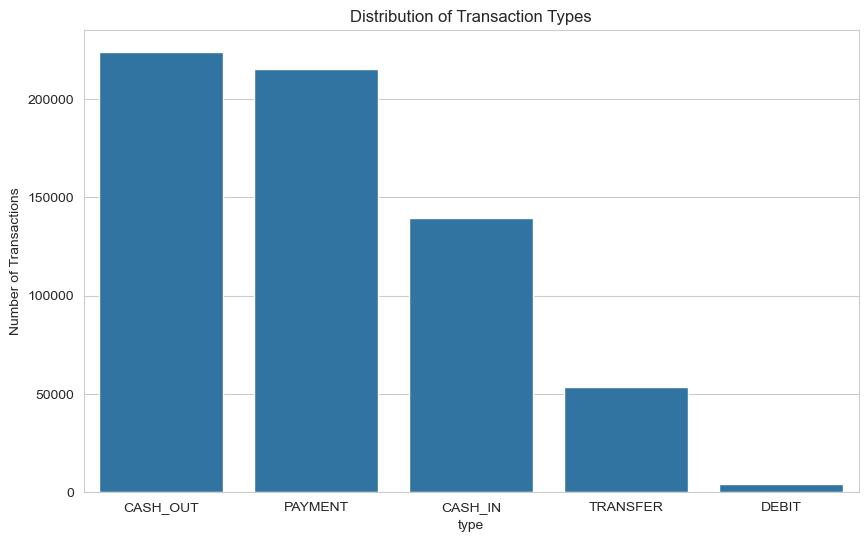

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index)
plt.title('Distribution of Transaction Types')
plt.ylabel('Number of Transactions')
plt.show()

Question 2: How many transactions are actually fraudulent? Is our data imbalanced?

In [5]:

fraud_counts = df['isFraud'].value_counts()
fraud_percentage = df['isFraud'].value_counts(normalize=True) * 100

print(f"Fraud Counts:\n{fraud_counts}")
print(f"\nFraud Percentage:\n{fraud_percentage}")

Fraud Counts:
isFraud
0    635445
1       817
Name: count, dtype: int64

Fraud Percentage:
isFraud
0    99.871594
1     0.128406
Name: proportion, dtype: float64


Question 3: What do fraudulent transactions look like?

In [6]:
fraud_by_type = df.groupby('type')['isFraud'].sum()

print("Number of Fraudulent Transactions by Type:")
print(fraud_by_type)

Number of Fraudulent Transactions by Type:
type
CASH_IN       0
CASH_OUT    402
DEBIT         0
PAYMENT       0
TRANSFER    415
Name: isFraud, dtype: int64


Step 4: Summarize  Findings

The dataset contains over 600,000 transactions with no missing values.

The data is highly imbalanced; fraudulent transactions are very rare.

Fraud only occurs in TRANSFER and CASH_OUT type transactions. This is a critical pattern.

The amount column has a very wide range, suggesting potential outliers.